# Preços de moradias em São Paulo

**Dados**


* **Endereço:** O endereço do imóvel
* **Distrito:** O distrito onde o imóvel está localizado
* **Área:** A área do imóvel em metros quadrados
* **Quartos:** O número de quartos na propriedade
* **Garagem:** O número de vagas de estacionamento disponíveis na propriedade
* **Aluguel:** O aluguel mensal do imóvel
* **Tipo:** O tipo do imóvel (apartamento, casa, etc.)
* **Total:** O custo total do imóvel, incluindo aluguel, impostos e outras taxas.

# Aula 01 - Trabalhando com os dados


## Importando a base de dados

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# importando os dados
dados <- read.csv("data.csv", sep=";")

Warning message in file(file, "rt"):
“cannot open file 'data.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
# visualizando os dados importados
dados

In [ ]:
# Exibir as primeiras linhas do dataframe
head(dados)

,address,district,area,bedrooms,garage,type,rent,total
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>
1,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
2,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
3,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
4,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
5,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
6,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587


## Limpando os dados

### Identificando linhas com dados nulos

In [ ]:
# Verificando se há dados faltantes
is.na(dados)

In [ ]:
sum(is.na(dados))

[1] 46

In [ ]:
rowSums(is.na(dados))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

In [ ]:
rowSums(is.na(dados)) > 0

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [ ]:
linhas_invalidas <- rowSums(is.na(dados)) > 0

In [ ]:
dados[linhas_invalidas, ]

,address,district,area,bedrooms,garage,type,rent,total
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>
24,Avenida Rio Branco,,NA,NA,NA,,NA,NA
85,,Sacomã,NA,2,NA,Apartamento,NA,NA
439,Rua Ernani Pinto,Vila Maria Alta,123,3,1,Apartamento,NA,NA
713,Rua Poconé,,NA,NA,NA,,NA,NA
961,Rua Trapiche,Vila Matilde,NA,NA,NA,Casa em condomínio,NA,NA
1320,,,NA,NA,NA,,NA,NA
1637,,,NA,NA,NA,,NA,NA
1949,,,NA,NA,NA,,NA,NA
9170,,,NA,NA,NA,,NA,NA


### Removendo linhas com dados faltantes

In [ ]:
# Remover linhas com dados faltantes
dados_limpo <- na.omit(dados)

In [ ]:
# Utilizanod o SUM para visualizar de forma mais clara
sum(is.na(dados_limpo))

[1] 0

## Criando novas variáveis

In [ ]:
head(dados_limpo)

,address,district,area,bedrooms,garage,type,rent,total
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>
1,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
2,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
3,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
4,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
5,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
6,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587


Criando novas variaveis:

Para criar uma nova variável que representa o valor do aluguel e o custo total por metro quadrado em sua base de dados, você pode seguir os seguintes passos no R:

In [ ]:
# Criar a nova variável 'Aluguel_por_metro_quadrado'
dados_limpo$Aluguel_por_metro_quadrado <- dados_limpo$rent / dados_limpo$area

In [ ]:
# Criar a nova variável 'Total_por_metro_quadrado'
dados_limpo$Total_por_metro_quadrado <- dados_limpo$total / dados_limpo$area

In [ ]:
head(dados_limpo)

,address,district,area,bedrooms,garage,type,rent,total,Aluguel_por_metro_quadrado,Total_por_metro_quadrado
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,114.28571,139.95238
2,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,68.66667,89.66667
3,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,222.22222,258.94444
4,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,31.25000,34.89286
5,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,210.52632,244.94737
6,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587,76.00000,91.74000


# Aula 02 - Estatísticas Descritivas

### Média

In [ ]:
head(dados_limpo)

,address,district,area,bedrooms,garage,type,rent,total,Aluguel_por_metro_quadrado,Total_por_metro_quadrado
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,114.28571,139.95238
2,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,68.66667,89.66667
3,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,222.22222,258.94444
4,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,31.25000,34.89286
5,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,210.52632,244.94737
6,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587,76.00000,91.74000


In [ ]:
mean(dados_limpo$total)

[1] 4081.105

In [ ]:
aggregate(list(Total = dados_limpo$total), list(Type = dados_limpo$type), mean)

Type,Total
<chr>,<dbl>
Apartamento,4437.047
Casa,3824.244
Casa em condomínio,4576.232
Studio e kitnet,2668.934


In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
df_selecionado <- dados_limpo %>%
  select(type, rent, total, Aluguel_por_metro_quadrado, Total_por_metro_quadrado)

In [ ]:
aggregate(dados_limpo %>% select(rent, total, Aluguel_por_metro_quadrado, Total_por_metro_quadrado), list(Type = dados_limpo$type), mean)

Type,rent,total,Aluguel_por_metro_quadrado,Total_por_metro_quadrado
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Apartamento,3358.033,4437.047,Inf,Inf
Casa,3471.925,3824.244,Inf,Inf
Casa em condomínio,3912.552,4576.232,68.29282,85.16387
Studio e kitnet,2128.489,2668.934,72.76630,90.55275


### Variância e Desvio Padrão

Calcular a Variância e o Desvio Padrão do Campo `Total`:

In [ ]:
# Calcular a variância do campo Total
variancia_total <- var(dados_limpo$total)

# Calcular o desvio padrão do campo Total
desvio_padrao_total <- sd(dados_limpo$total)

# Exibir os resultados
print(paste("A variância do campo Total é:", variancia_total))
print(paste("O desvio padrão do campo Total é:", desvio_padrao_total))

[1] "A variância do campo Total é: 11239123.9878232"
[1] "O desvio padrão do campo Total é: 3352.48027403938"


Calcular a Variância e o Desvio Padrão para Cada Tipo de Imóvel:

In [ ]:
library(dplyr)

In [ ]:
# Calcular a variância e o desvio padrão por Tipo de Imóvel
resumo_tipo_imovel <- dados_limpo %>%
  group_by(type) %>%
  summarise(
    Variancia_Total = var(total),
    Desvio_Padrao_Total = sd(total)
  )

# Exibir o resumo
print(resumo_tipo_imovel)


# A tibble: 4 × 3
  type               Variancia_Total Desvio_Padrao_Total
  <chr>                        <dbl>               <dbl>
1 Apartamento              12222143.               3496.
2 Casa                     10621485.               3259.
3 Casa em condomínio       22408846.               4734.
4 Studio e kitnet           2637647.               1624.


Identificar Outliers:

In [ ]:
# Identificar outliers usando o desvio padrão
media_total <- mean(dados$total)
lim_inf <- media_total - 2 * desvio_padrao_total
lim_sup <- media_total + 2 * desvio_padrao_total

outliers <- dados$total[dados$total < lim_inf | dados$total > lim_sup]

print(paste("Outliers identificados:", outliers))

  [1] "Outliers identificados: 11660" "Outliers identificados: 11210"
  [3] "Outliers identificados: 17410" "Outliers identificados: 13620"
  [5] "Outliers identificados: 13700" "Outliers identificados: 11560"
  [7] "Outliers identificados: 11350" "Outliers identificados: 15310"
  [9] "Outliers identificados: 12930" "Outliers identificados: 19530"
 [11] "Outliers identificados: 12930" "Outliers identificados: 16140"
 [13] "Outliers identificados: 11340" "Outliers identificados: 10880"
 [15] "Outliers identificados: 11180" "Outliers identificados: 15260"
 [17] "Outliers identificados: 15190" "Outliers identificados: 12160"
 [19] "Outliers identificados: 13920" "Outliers identificados: 13280"
 [21] "Outliers identificados: 12890" "Outliers identificados: 18500"
 [23] "Outliers identificados: 15800" "Outliers identificados: 14200"
 [25] "Outliers identificados: 12190" "Outliers identificados: 12830"
 [27] "Outliers identificados: 15620" "Outliers identificados: 18090"
 [29] "Outliers iden

# Aula 03 - Visualização de dados

In [ ]:
head(dados_limpo)

,address,district,area,bedrooms,garage,type,rent,total,Aluguel_por_metro_quadrado,Total_por_metro_quadrado
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,114.28571,139.95238
2,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,68.66667,89.66667
3,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,222.22222,258.94444
4,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,31.25000,34.89286
5,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,210.52632,244.94737
6,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587,76.00000,91.74000


In [ ]:
library(ggplot2)

### Boxplot

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


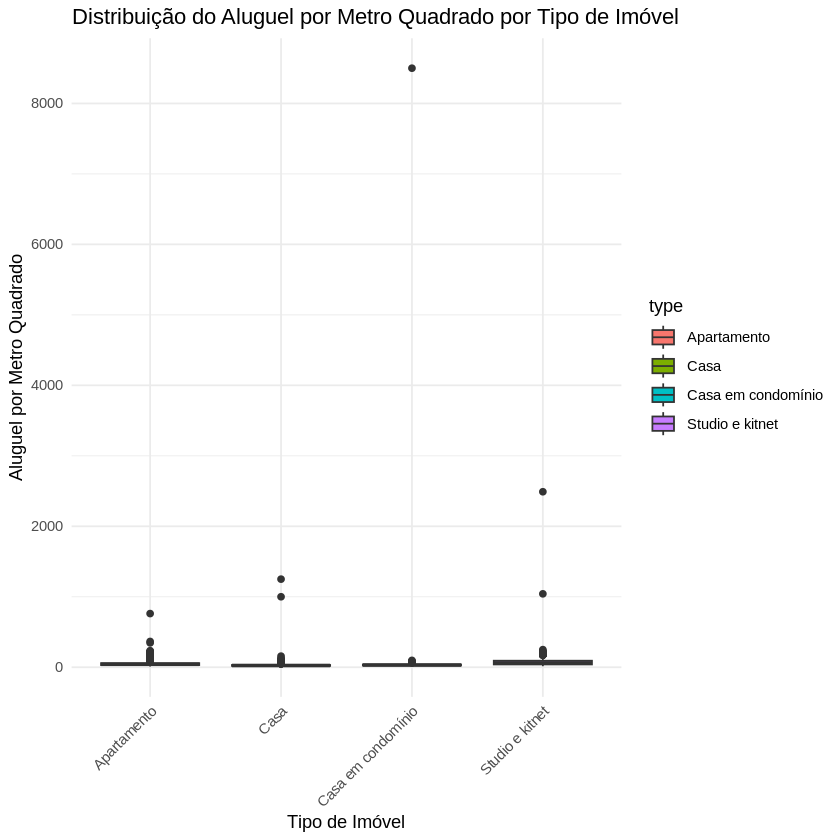

In [ ]:
ggplot(dados_limpo, aes(x = type, y = Aluguel_por_metro_quadrado, fill = type)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Distribuição do Aluguel por Metro Quadrado por Tipo de Imóvel",
       x = "Tipo de Imóvel",
       y = "Aluguel por Metro Quadrado") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

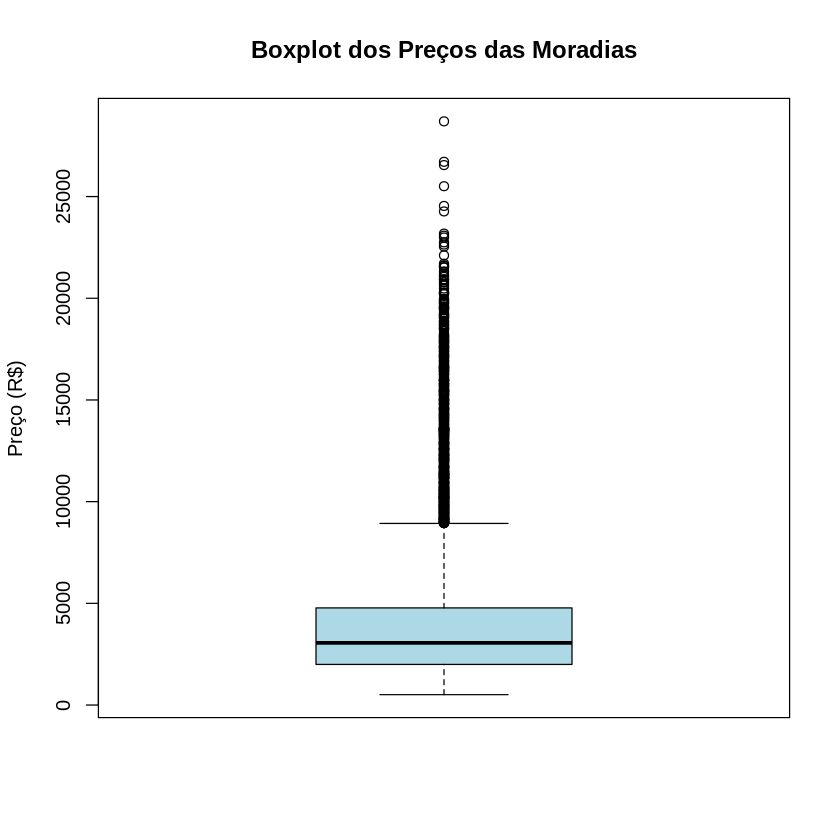

In [ ]:
# Criar um boxplot dos preços
boxplot(dados_limpo$total,
        main = "Boxplot dos Preços das Moradias",
        ylab = "Preço (R$)",
        col = "lightblue",
        border = "black")

### Histograma

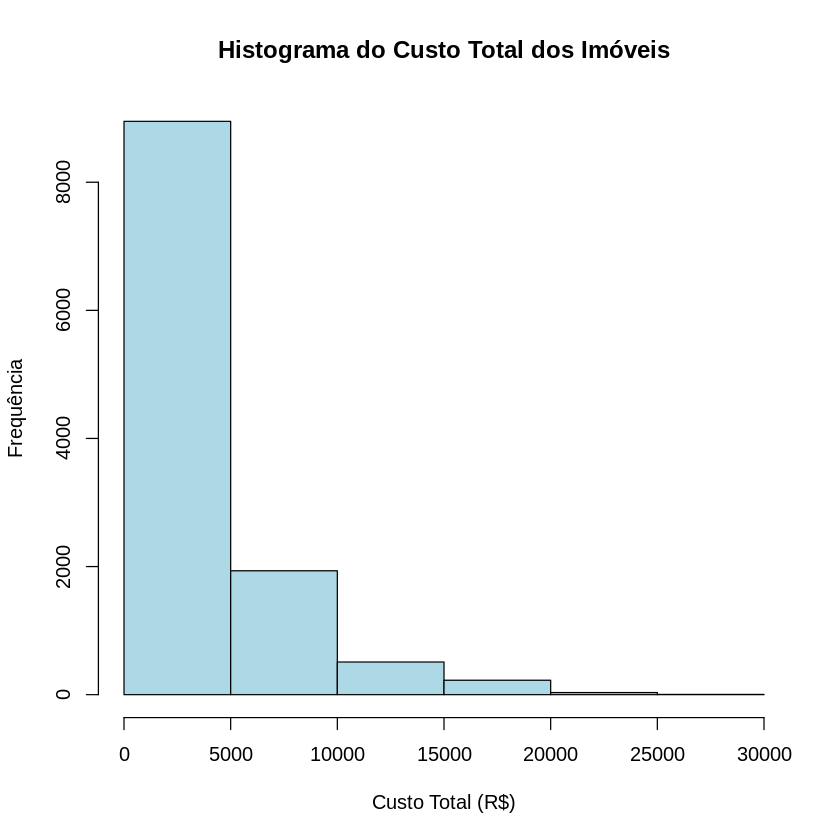

In [ ]:
# Criar um histograma para a variável Total
hist(dados$total,
     main = "Histograma do Custo Total dos Imóveis",  # Título do gráfico
     xlab = "Custo Total (R$)",                      # Rótulo do eixo x
     ylab = "Frequência",                           # Rótulo do eixo y
     col = "lightblue",                            # Cor das barras
     border = "black",                             # Cor da borda das barras
     breaks = 5)                                   # Número de intervalos

###Gráficos de Barra

**a. Contagem de Imóveis por Tipo**
Um gráfico de barras que mostra a quantidade de imóveis por tipo.

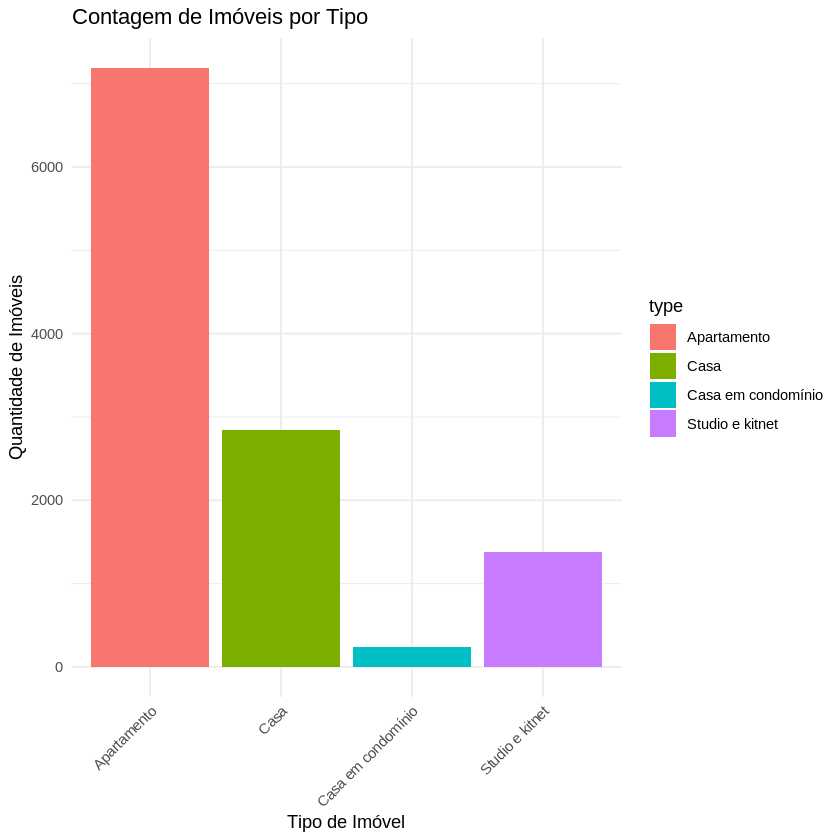

In [ ]:
# Gráfico de barras: Contagem de imóveis por tipo
ggplot(dados_limpo, aes(x = type, fill = type)) +
  geom_bar() +
  theme_minimal() +
  labs(title = "Contagem de Imóveis por Tipo",
       x = "Tipo de Imóvel",
       y = "Quantidade de Imóveis") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

###Gráficos de Dispersão

**a. Aluguel vs. Área**
Um gráfico de dispersão que mostra a relação entre o aluguel e a área do imóvel.

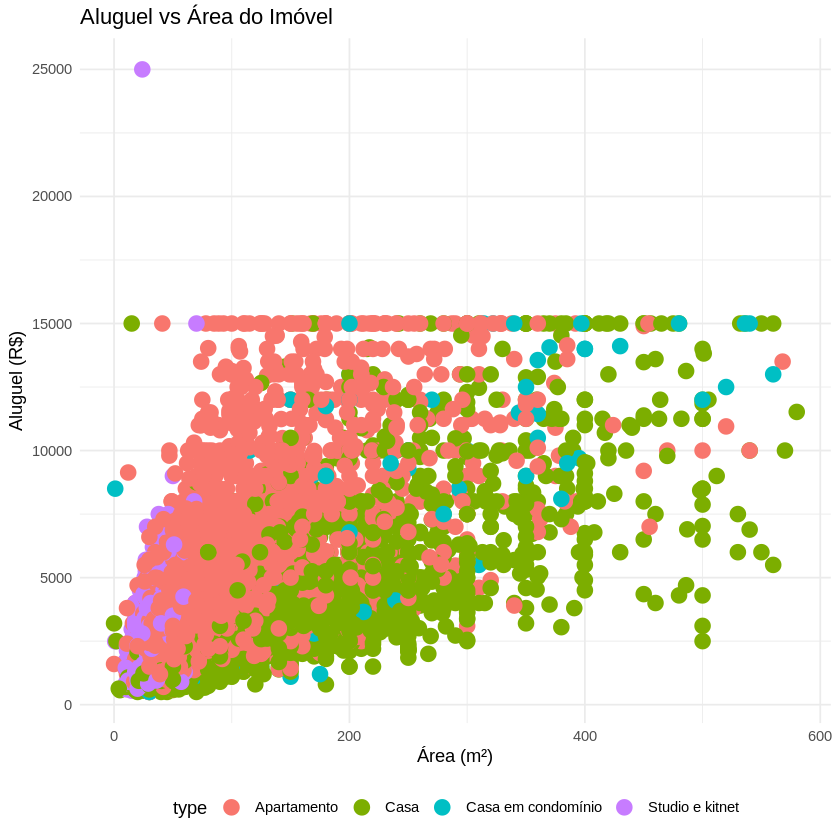

In [ ]:
# Gráfico de dispersão: Aluguel vs Área
ggplot(dados_limpo, aes(x = area, y = rent, color = type)) +
  geom_point(size = 4) +
  theme_minimal() +
  labs(title = "Aluguel vs Área do Imóvel",
       x = "Área (m²)",
       y = "Aluguel (R$)") +
  theme(legend.position = "bottom")

**b. Total vs. Área**
Um gráfico de dispersão que mostra a relação entre o custo total e a área do imóvel.

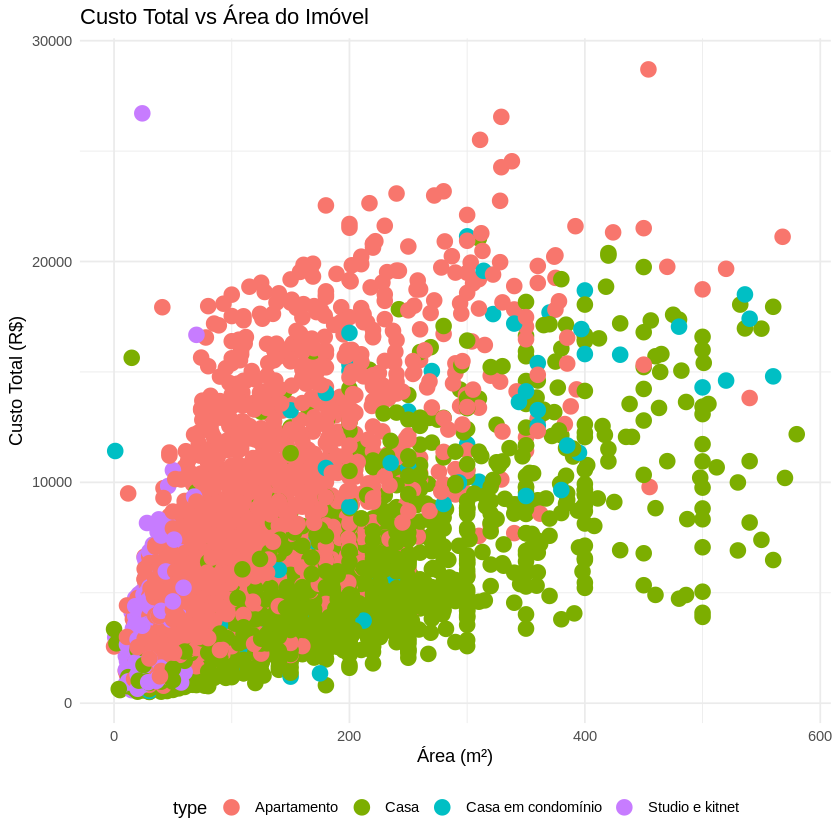

In [ ]:
ggplot(dados_limpo, aes(x = area, y = total, color = type)) +
  geom_point(size = 4) +
  theme_minimal() +
  labs(title = "Custo Total vs Área do Imóvel",
       x = "Área (m²)",
       y = "Custo Total (R$)") +
  theme(legend.position = "bottom")

# Aula 04 - Distribuição de Frequencia

### Uma Variavel

In [ ]:
head(dados_limpo)

,address,district,area,bedrooms,garage,type,rent,total,Aluguel_por_metro_quadrado,Total_por_metro_quadrado
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,114.28571,139.95238
2,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,68.66667,89.66667
3,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,222.22222,258.94444
4,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,31.25000,34.89286
5,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,210.52632,244.94737
6,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587,76.00000,91.74000


In [ ]:
table(dados_limpo$bedrooms)


   0    1    2    3    4    5    6 
  37 4188 4342 2423  543   91   23 

In [ ]:
prop.table(table(dados_limpo$bedrooms)) * 100


         0          1          2          3          4          5          6 
 0.3176784 35.9577574 37.2799863 20.8036404  4.6621448  0.7813171  0.1974757 

In [ ]:
freq <- cbind(freq = table(dados_limpo$bedrooms), percent = prop.table(table(dados_limpo$bedrooms)) * 100)
freq

,freq,percent
0,37,0.3176784
1,4188,35.9577574
2,4342,37.2799863
3,2423,20.8036404
4,543,4.6621448
5,91,0.7813171
6,23,0.1974757


In [ ]:
colnames(freq) <- c('Frequência', 'Porcentagem')
freq

,Frequência,Porcentagem
0,37,0.3176784
1,4188,35.9577574
2,4342,37.2799863
3,2423,20.8036404
4,543,4.6621448
5,91,0.7813171
6,23,0.1974757


In [ ]:
rownames(freq) <- c('0 banheiros','1 banheiro', '2 banheiros', '3 banheiros', '4 banheiros', '5 banheiros', '6 banheiros')
freq

,Frequência,Porcentagem
0 banheiros,37,0.3176784
1 banheiro,4188,35.9577574
2 banheiros,4342,37.2799863
3 banheiros,2423,20.8036404
4 banheiros,543,4.6621448
5 banheiros,91,0.7813171
6 banheiros,23,0.1974757


### Duas variaveis

In [ ]:
table(dados_limpo$bedrooms, dados_limpo$type)

   
    Apartamento Casa Casa em condomínio Studio e kitnet
  0           7    4                  0              26
  1        2047  762                 64            1320
  2        3419  798                 96              34
  3        1482  892                 49               0
  4         227  291                 25               0
  5          10   75                  6               0
  6           2   19                  1               1

In [ ]:
frequencia <- table(dados_limpo$bedrooms, dados_limpo$type)
frequencia

   
    Apartamento Casa Casa em condomínio Studio e kitnet
  0           7    4                  0              26
  1        2044  762                 64            1318
  2        3414  798                 96              34
  3        1482  892                 49               0
  4         227  291                 25               0
  5          10   75                  6               0
  6           2   19                  1               1

In [ ]:
rownames(frequencia) <- c('0 banheiros','1 banheiro', '2 banheiros', '3 banheiros', '4 banheiros', '5 banheiros', '6 banheiros')
colnames(frequencia) <- c('Apartamento', 'Casa', 'Casa em condomínio', 'Studio e kitnet')
frequencia <- cbind(frequencia)
frequencia

,Apartamento,Casa,Casa em condomínio,Studio e kitnet
0 banheiros,7,4,0,26
1 banheiro,2044,762,64,1318
2 banheiros,3414,798,96,34
3 banheiros,1482,892,49,0
4 banheiros,227,291,25,0
5 banheiros,10,75,6,0
6 banheiros,2,19,1,1


In [ ]:
# Calculando a percentagem
percentual <- prop.table(frequencia) * 100
percentual

,Apartamento,Casa,Casa em condomínio,Studio e kitnet
0 banheiros,0.06010131,0.03434361,0.000000000,0.223233451
1 banheiro,17.54958358,6.54245729,0.549497725,11.316218769
2 banheiros,29.31226925,6.85154976,0.824246587,0.291920666
3 banheiros,12.72430669,7.65862454,0.420709196,0.000000000
4 banheiros,1.94899974,2.49849747,0.214647549,0.000000000
5 banheiros,0.08585902,0.64394265,0.051515412,0.000000000
6 banheiros,0.01717180,0.16313214,0.008585902,0.008585902


### Classes

In [ ]:
min(dados_limpo$rent)

[1] 500

In [ ]:
max(dados_limpo$rent)

[1] 25000

In [ ]:
classes <- c(500, 3500, 9500, 16500, 10000, 25000)

In [ ]:
labels <- c('A', 'B', 'C', 'D', 'E')

In [ ]:
cut(
  x = dados_limpo$rent,
  breaks = classes,
  labels = labels,
  include.lowest = TRUE
)

[1] A A B A B B A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
   [37] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A
   [73] A A A A B A A A A A A A A A A A A A A A A B B A A A B A A A A B A A A A
  [109] A A B A A B A A A A A A A B B A A A A A A A A A A A A A A A A A A A A A
  [145] A A A A A A B A A A B A A A A A A A A A A B A A A A A A A A A A A B A A
  [181] A A A B A A A A A A A A A A A A A A D A A A A A B A A A A A A A A A A A
  [217] A A A A A A B B A B A A A A A A A B B A A A A A A A A A A A A A A B B A
  [253] A A A A A A B A A A A A B A A A A A A B B A A A A A B A A B B A A A B B
  [289] B B A A A A B A A A A A A A A B A B A A B A A A B B A A A B A A B A A A
  [325] A A A A B A B A B A B A A A A A A A A A B A A B A A A A A A B A A A B A
  [361] A B A B A A A A B A A B A A A A A A A A A A A A A A B A B A A A A A A A
  [397] A B D A A A A B A A A A A A A A A A A A B A A A A A A A A A A A A A A B
  [433] A A A A A B A A B A B A A B A A A A A A A A A A A A A A A A A A A A A A
  [469] A A A A A A A A A A A A A A A A A A A A A A A A A A B A A A A A A A A A
  [505] A A A A A A A A A A A A A A A A A A A A A A A A A A B A B A A A A A A A
  [541] A A A A B A A B A A A A A B A A A A A B A A A B A A A A A A A A A A A A
  [577] A A A A A A A A A A A A A A A A A A A A A A B A A A A A A A A A A A A B
  [613] B B A A A A A A A A A A A A A A A A A A A A A A A A B A A B B A B A A A
  [649] A A A A A A A A A A A A A A A A A A A A A A A A B A A A A A A B A B A A
  [685] A A A A A A A A A A A A A A A A A A A A A A A A A A B B A A A A A B A A
  [721] A A A A A A A A A B A A A A A A A A A A A B A A A A A A B B A A B A A A
  [757] A A A A D A A A B A A B B A B A A A B A B B A A A A B B A A A A A A A A
  [793] A B A A B A B B A A A B A A D A A A A A A B A B A A B A A A A A A B B A
  [829] A A A A A A A A A A B A A A A B B A A A B A A A A A A A A A A B A A A A
  [865] A A A A A B A A A B B A A A A A A A A A A A B A A A A A A B A A A A A A
  [901] A A A A A A B A A A B B A B A A A A A A A A A A A A A A A A A A A A A A
  [937] A A A A A A A A A A A A A A A A B A A A A A A A B A A A A A A A A A A A
  [973] A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A A B
 [1009] A A A A A A A B A A A A A A A B A B A A A B A A A A A A A A A A A A A B
 [1045] A A A A A A A A A A A A A A A A A A A A A A A A A A A B A A A A A A A A
 [1081] A A A A A A A A A A A B A A A A A A A A B A A A A A A B A A A A B A B A
 [1117] A B A A A B A A B A A B A A A A A A B A B A A A A A A A A A A A B A A A
 [1153] A B B A A A A A A A B A A A A A A A A A A A A A B A A A A A B A A A A A
 [1189] A A B A A B A A A A B A B B A A A B A B A B B A A A A A B A A A A A A B
 [1225] A A A A B A B A A B A B A A A A A A B A A B A A A A A A B A A B A A A A
 [1261] A A A A A A A A A A B B A A A A B B B B A B A A A A B A B A A A A A B A
 [1297] A A A A A A A A A B A A C A A A B A A A A A A A A A A B A A A A A A B A
 [1333] A A A B A A A A A A B A D A D A D B A B A B A B D A A A A A A A A A B A
 [1369] A A A A A B A A A A A A A A A A A B A A A A A A A A A A A A A A A A A A
 [1405] A A A A A A A A A A A A A A A A A A A A A A A A A A A A B B A A A B B A
 [1441] A A A A A A B A B A B A B A A A B A A A A A A A A A A A A A A A A A A A
 [1477] B A A A B B A A A A A A B A A B A A A A A A A A A A A A A B A A A A B A
 [1513] A A A A A A A A B A A A A A A A A B A A A A B A A A A A B A B A B A A A
 [1549] A A A A A A A B A A A A A A A A A B A A A A A A A B A A B A A A A A A A
 [1585] A A A B A A A A A A A A B A A A A A A A A B A A A A A A A A A A A A A A
 [1621] A A A A B A A A A A A A A A A B A A A A A A A A A A A A A D A A A A A A
 [1657] A A A A A A A A A A C A A A A A A B A A B A A A A A B A A A A A A A B A
 [1693] A A A A A A A A B A B A A B A B A A A A A B A A A A A B B B B A A A A A
 [1729] A A A A B A A A B A A B A A A B B B A A A A A A A A A A B A A B B A B B
 [1765] A A A A B B A B A A A B A A A A A A A A A A A A A A B A A A A A A A A A
 [18

In [ ]:
frequencia <- table(
  cut(
    x = dados_limpo$rent,
    breaks = classes,
    labels = labels,
    include.lowest = TRUE
  )
)
frequencia


   A    B    C    D    E 
8376 2734  106  430    1 

In [ ]:
percentual <- prop.table(frequencia) * 100
percentual


           A            B            C            D            E 
71.915514725 23.473855929  0.910105607  3.691937838  0.008585902 

In [ ]:
freq_perzonalizado <- cbind('Frequência' = frequencia, 'Percentagem' = percentual)
freq_perzonalizado

,Frequência,Percentagem
A,8376,71.915514725
B,2734,23.473855929
C,106,0.910105607
D,430,3.691937838
E,1,0.008585902


### Hist

# Aula 05 - Correlação e regressão linear


### Correlação

Vamos calcular a correlação entre a Área e o Total do imóvel.

In [ ]:
# Calcular a correlação entre Área e Total
correlacao <- cor(dados$area, dados$total)

# Exibir o valor da correlação
print(paste("Correlação entre Área e Total:", correlacao))


[1] "Correlação entre Área e Total: 0.652128137055065"


### Regressão linear 01

Vamos ajustar um modelo de regressão linear para prever o Total com base na Área.


In [ ]:
# Ajustar um modelo de regressão linear
modelo_regressao <- lm(total ~ area, data = dados)

# Resumo do modelo de regressão
summary(modelo_regressao)



Call:
lm(formula = total ~ area, data = dados)

Residuals:
   Min     1Q Median     3Q    Max 
-12440  -1349   -529    820  24422 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1579.668     35.764   44.17   <2e-16 ***
area          29.536      0.318   92.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2542 on 11655 degrees of freedom
Multiple R-squared:  0.4253,	Adjusted R-squared:  0.4252 
F-statistic:  8624 on 1 and 11655 DF,  p-value: < 2.2e-16


Vamos criar um gráfico de dispersão com a linha de regressão para visualizar a relação entre Área e Total.

In [ ]:
install.packages("ggplot2")
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'


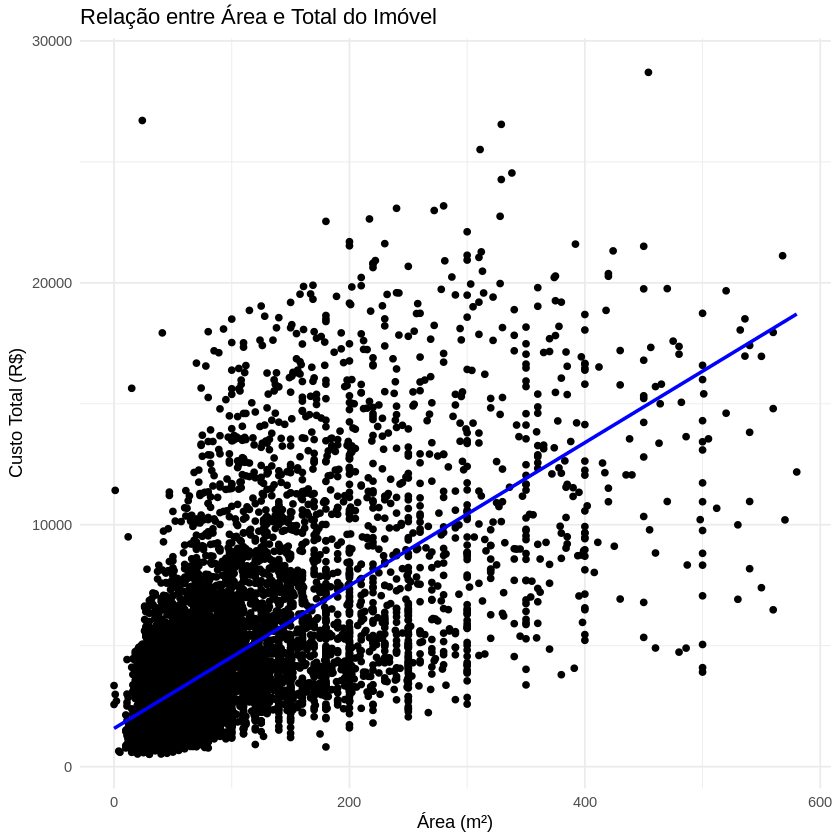

In [ ]:
# Criar um gráfico de dispersão com linha de regressão
ggplot(dados, aes(x = area, y = total)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Relação entre Área e Total do Imóvel",
       x = "Área (m²)",
       y = "Custo Total (R$)") +
  theme_minimal()

### Regressão linear 02

In [ ]:
head(dados_limpo)

,address,district,area,bedrooms,garage,type,rent,total,Aluguel_por_metro_quadrado,Total_por_metro_quadrado
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,114.28571,139.95238
2,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,68.66667,89.66667
3,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,222.22222,258.94444
4,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,31.25000,34.89286
5,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,210.52632,244.94737
6,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587,76.00000,91.74000


In [ ]:
# Criar o modelo de regressão linear
modelo3 <- lm(rent ~ total, data = dados_limpo)

# Resumo do modelo
summary(modelo3)



Call:
lm(formula = rent ~ total, data = dados_limpo)

Residuals:
    Min      1Q  Median      3Q     Max 
-7290.9  -208.8     8.4   205.5  4248.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 95.563468   8.054156   11.87   <2e-16 ***
total        0.773356   0.001525  507.19   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 551.8 on 11645 degrees of freedom
Multiple R-squared:  0.9567,	Adjusted R-squared:  0.9567 
F-statistic: 2.572e+05 on 1 and 11645 DF,  p-value: < 2.2e-16


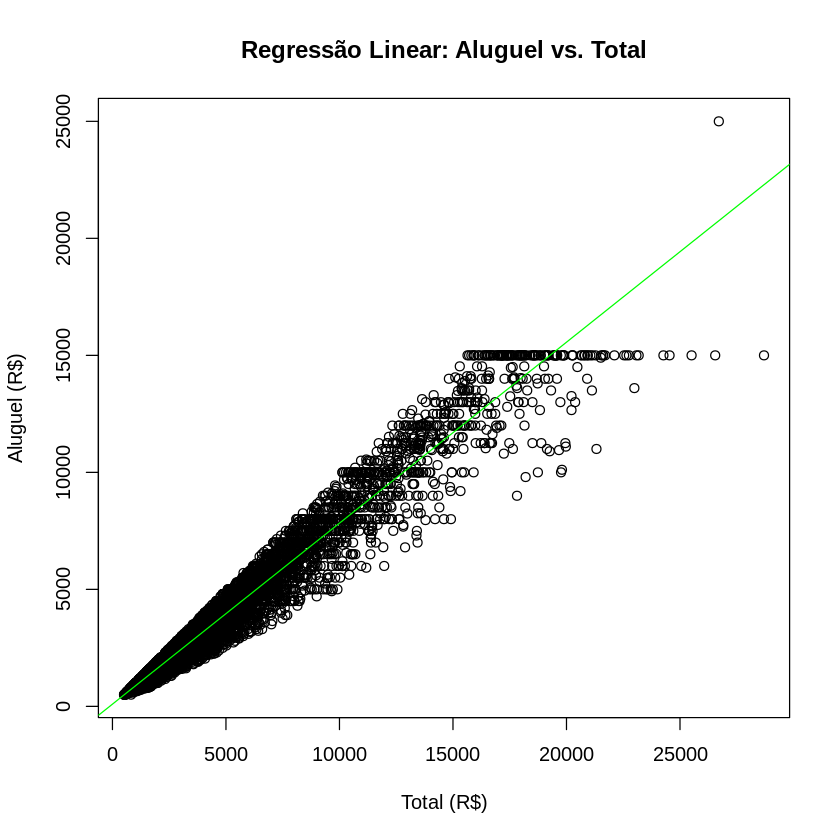

In [ ]:
# Plotar a regressão linear
plot(dados_limpo$total, dados_limpo$rent,
     main = "Regressão Linear: Aluguel vs. Total",
     xlab = "Total (R$)", ylab = "Aluguel (R$)")
abline(modelo3, col = "green")

### Nova seção

In [ ]:
# Ajustar um modelo de regressão linear
modelo_regressao01 <- lm(rent ~ area, data = dados_limpo)

# Resumo do modelo de regressão
summary(modelo_regressao01)


Call:
lm(formula = rent ~ area, data = dados_limpo)

Residuals:
     Min       1Q   Median       3Q      Max 
-10675.2  -1059.9   -460.0    578.9  23198.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1227.8346    27.8167   44.14   <2e-16 ***
area          23.8947     0.2473   96.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1975 on 11643 degrees of freedom
Multiple R-squared:  0.4451,	Adjusted R-squared:  0.4451 
F-statistic:  9339 on 1 and 11643 DF,  p-value: < 2.2e-16


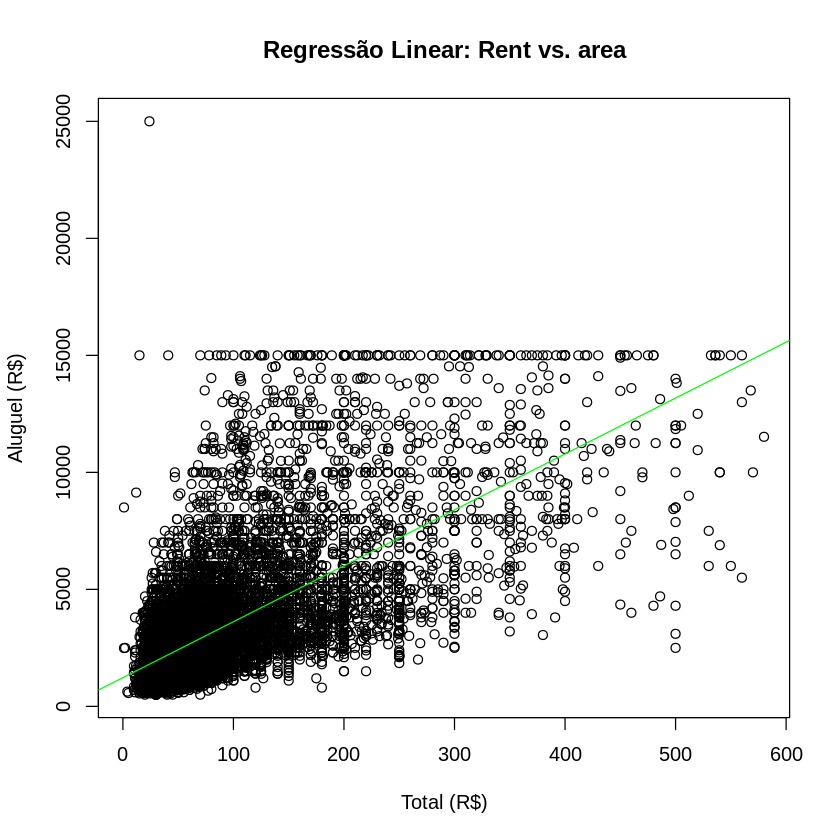

In [ ]:
# Plotar a regressão linear
plot(dados_limpo$area, dados_limpo$rent,
     main = "Regressão Linear: Rent vs. area",
     xlab = "Total (R$)", ylab = "Aluguel (R$)")
abline(modelo_regressao01, col = "green")

### Nova seção

In [ ]:
# Criar o modelo de regressão linear
modelo4 <- lm(area ~ Total_por_metro_quadrado, data = dados_limpo)

# Resumo do modelo
summary(modelo4)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'x'


In [ ]:
dados_limpo <- dados_limpo[!is.infinite(dados_limpo$Aluguel_por_metro_quadrado) & !is.infinite(dados_limpo$Total_por_metro_quadrado), ]

In [ ]:
# Check for NA, NaN, and Inf values in 'Total_por_metro_quadrado'
any(is.na(dados_limpo$Total_por_metro_quadrado))  # Check for NA
any(is.nan(dados_limpo$Total_por_metro_quadrado))  # Check for NaN
any(is.infinite(dados_limpo$Total_por_metro_quadrado))  # Check for Inf

[1] FALSE

[1] FALSE

[1] FALSE

In [ ]:
# Criar o modelo de regressão linear
modelo4 <- lm(area ~ Total_por_metro_quadrado, data = dados_limpo)

# Resumo do modelo
summary(modelo4)


Call:
lm(formula = area ~ Total_por_metro_quadrado, data = dados_limpo)

Residuals:
   Min     1Q Median     3Q    Max 
-75.75 -43.52 -25.76  11.60 661.91 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              88.550403   0.764805  115.78   <2e-16 ***
Total_por_metro_quadrado -0.065627   0.005891  -11.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 73.65 on 11643 degrees of freedom
Multiple R-squared:  0.01055,	Adjusted R-squared:  0.01046 
F-statistic: 124.1 on 1 and 11643 DF,  p-value: < 2.2e-16


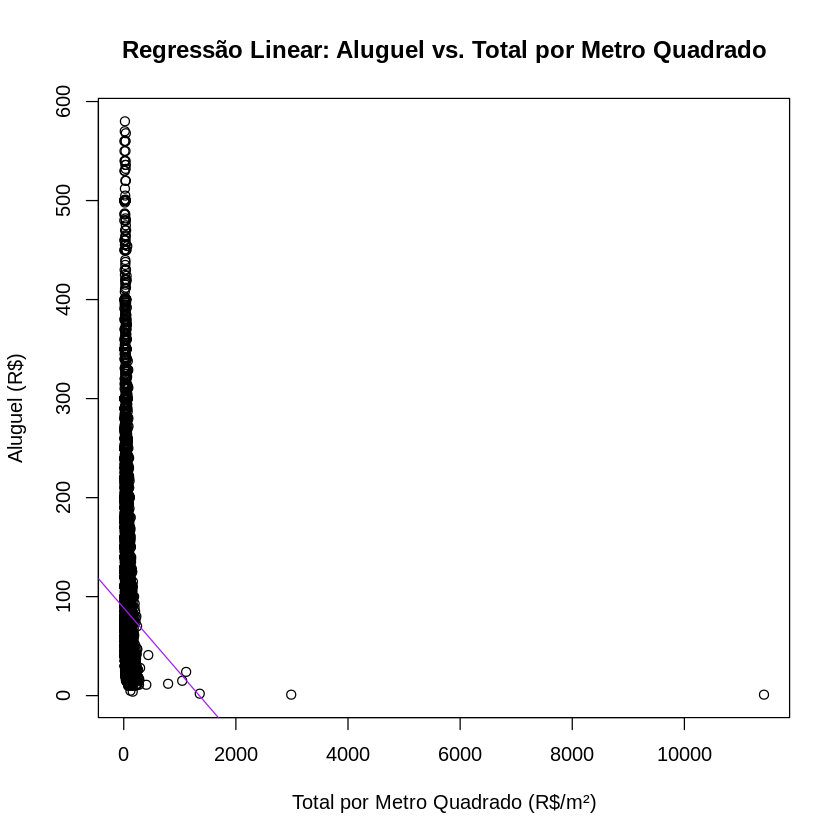

In [ ]:
# Plotar a regressão linear
plot(dados_limpo$Total_por_metro_quadrado, dados_limpo$area,
     main = "Regressão Linear: Aluguel vs. Total por Metro Quadrado",
     xlab = "Total por Metro Quadrado (R$/m²)", ylab = "Aluguel (R$)")
abline(modelo4, col = "purple")

### Nova seção

In [ ]:
# Criar o modelo de regressão linear
modelo5 <- lm(area ~ Aluguel_por_metro_quadrado, data = dados_limpo)

# Resumo do modelo
summary(modelo5)


Call:
lm(formula = area ~ Aluguel_por_metro_quadrado, data = dados_limpo)

Residuals:
   Min     1Q Median     3Q    Max 
-73.63 -43.51 -25.91  11.46 678.77 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                88.917224   0.771682  115.22   <2e-16 ***
Aluguel_por_metro_quadrado -0.090198   0.007727  -11.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 73.61 on 11643 degrees of freedom
Multiple R-squared:  0.01157,	Adjusted R-squared:  0.01148 
F-statistic: 136.3 on 1 and 11643 DF,  p-value: < 2.2e-16


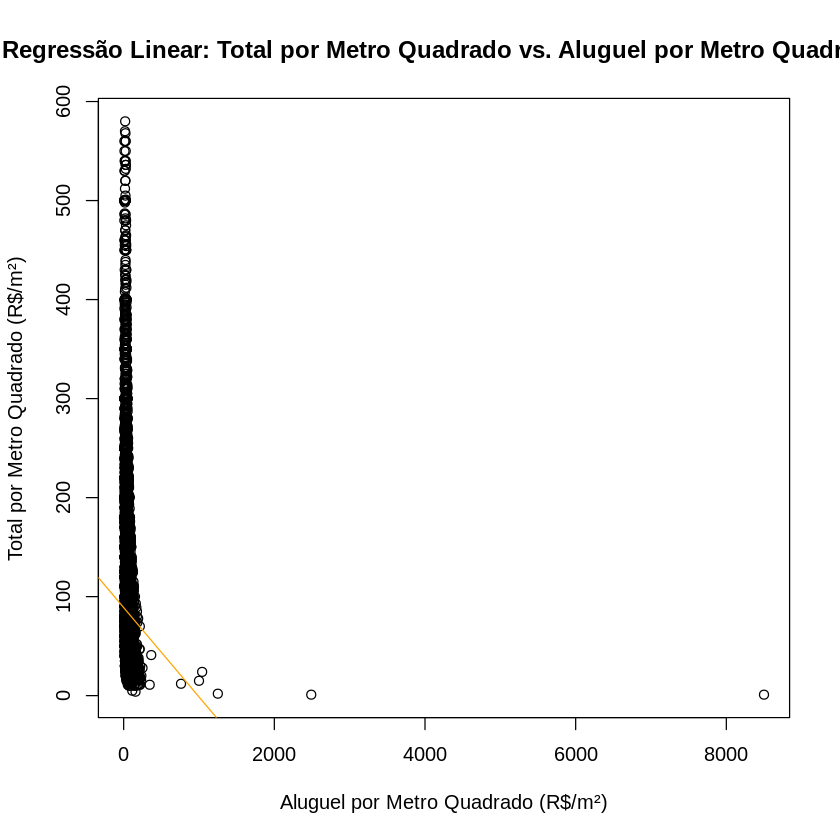

In [ ]:
# Plotar a regressão linear
plot(dados_limpo$Aluguel_por_metro_quadrado, dados_limpo$area,
     main = "Regressão Linear: Total por Metro Quadrado vs. Aluguel por Metro Quadrado",
     xlab = "Aluguel por Metro Quadrado (R$/m²)", ylab = "Total por Metro Quadrado (R$/m²)")
abline(modelo5, col = "orange")

### Nova seção

In [ ]:
# Criar o modelo de regressão linear
modelo6 <- lm(Total_por_metro_quadrado ~ Aluguel_por_metro_quadrado, data = dados_limpo)

# Resumo do modelo
summary(modelo6)



Call:
lm(formula = Total_por_metro_quadrado ~ Aluguel_por_metro_quadrado, 
    data = dados_limpo)

Residuals:
     Min       1Q   Median       3Q      Max 
-276.209   -3.977   -0.506    4.391  310.124 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -2.457831   0.105306  -23.34   <2e-16 ***
Aluguel_por_metro_quadrado  1.307333   0.001054 1239.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.05 on 11643 degrees of freedom
Multiple R-squared:  0.9925,	Adjusted R-squared:  0.9925 
F-statistic: 1.537e+06 on 1 and 11643 DF,  p-value: < 2.2e-16


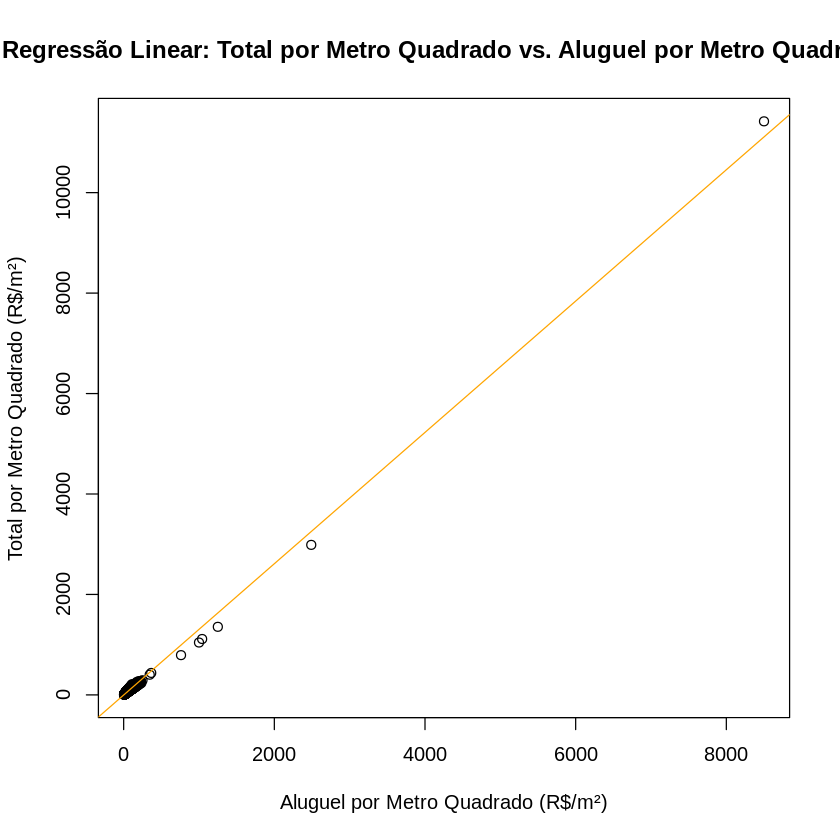

In [ ]:
# Plotar a regressão linear
plot(dados_limpo$Aluguel_por_metro_quadrado, dados_limpo$Total_por_metro_quadrado,
     main = "Regressão Linear: Total por Metro Quadrado vs. Aluguel por Metro Quadrado",
     xlab = "Aluguel por Metro Quadrado (R$/m²)", ylab = "Total por Metro Quadrado (R$/m²)")
abline(modelo6, col = "orange")